In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from tqdm.notebook import tqdm

In [3]:
def normalize(x):
    global mu, s
    mu = x.mean(axis=0)
    s = np.std(x,axis=0)
    return (x-mu)/s

In [30]:
mu = 0
s = 1
degree = 2

data = pd.read_excel('WeightHeight.xlsx').to_numpy()
X = data[:,:2].astype(float)
y = pd.factorize(data[:,-1],sort=True)[0].reshape(-1,1)

# X,y = datasets.make_moons(n_samples=100,random_state=12)
# y = y.reshape(-1,1)

# X,y = datasets.make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
# y = y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)

poly = PolynomialFeatures(degree = degree, interaction_only=False, include_bias=False)
X_train = poly.fit_transform(X_train)

X_train = np.c_[np.ones(len(X_train)), normalize(X_train)]


In [6]:
sigmoid = lambda x : 1/(1+np.exp(-x))

In [7]:
def predict(x):
    x = np.array(x)
    x = PolynomialFeatures(degree = degree, include_bias=False).fit_transform(x) 
    x = (x-mu)/s
    x = np.c_[np.ones(len(x)), x]
    return (sigmoid(x.dot(w)))

  0%|          | 0/5000 [00:00<?, ?it/s]

0.06305321759760915
0.06435571197628094


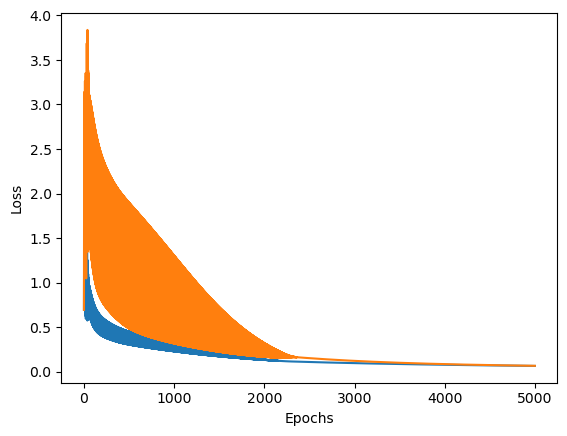

In [31]:
cost_train = []
cost_test = []
m = len(X_train)
alpha = 10
w = np.zeros((X_train.shape[1],1))
for epoch in tqdm(range(5000)):
    y_hat = sigmoid(X_train.dot(w))
    J = (-y_train*np.log(y_hat) - (1-y_train)*np.log(1-y_hat)).sum()/m
    cost_train.append(J)
    cost_test.append((-y_test*np.log(predict(X_test)) - (1-y_test)*np.log(1-predict(X_test))).sum()/len(X_test))
    
    grad = X_train.T.dot(y_hat-y_train)
    w -= alpha*grad/m
 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(cost_train);
plt.plot(cost_test);
    
print(cost_train[-1])
print(cost_test[-1])

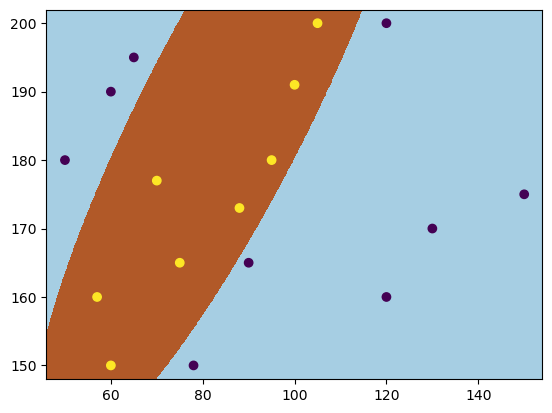

In [32]:
a = np.arange(X[:,0].min() - (X[:,0].max()-X[:,0].min())*0.04, X[:,0].max() + (X[:,0].max()-X[:,0].min())*0.04, (X[:,0].max()-X[:,0].min())*0.001)
b = np.arange(X[:,1].min() - (X[:,1].max()-X[:,1].min())*0.04, X[:,1].max() + (X[:,1].max()-X[:,1].min())*0.04, (X[:,1].max()-X[:,1].min())*0.001)
xx, yy = np.meshgrid(a, b)
x_region = np.c_[xx.reshape(-1,1), yy.reshape(-1,1)]
z = np.round(predict(x_region).reshape(xx.shape))

plt.pcolormesh(xx, yy, z, cmap=plt.cm.Paired)
plt.scatter(X[:,0], X[:,1], c=y[:,0])

In [34]:
'yes' if predict([[92,180]])[0,0]>=0.5 else 'no'
#predict([[92,180]])

'yes'